# 평균이동법, 지수평활법

## #01. 작업준비

### 1) 패키지 가져오기

평균이동법, 지수평활법을 위한 별도의 패키지는 필요하지 않다.

In [1]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
from hossam.timeserise import *
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sb
from matplotlib import pyplot as plt

# 시계열 분해 패키지
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from datetime import datetime as dt

### 2) 데이터 가져오기

월간 항공 승객 수

In [5]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/air_passengers.xlsx',index_col='Month')
my_pretty_table(origin.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

데이터프레임 상위 5개 행
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-01-01 00:00:00 |          112 |
| 1949-02-01 00:00:00 |          118 |
| 1949-03-01 00:00:00 |          132 |
| 1949-04-01 00:00:00 |          129 |
| 1949-05-01 00:00:00 |          121 |
+---------------------+--------------+

데이터프레임 하위 5개 행
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1960-08-01 00:00:00 |          606 |
| 1960-09-01 00:00:00 |          508 |
| 1960-10-01 00:00:00 |          461 |
| 1960-11-01 00:00:00 |          390 |
| 1960-12-01 00:00:00 |          432 |
+---------------------

## #02. 데이터 전처리 - 차분

정상성을 확보할 때 까지 차분을 수행한다.

=========== 원본 데이터 ===========


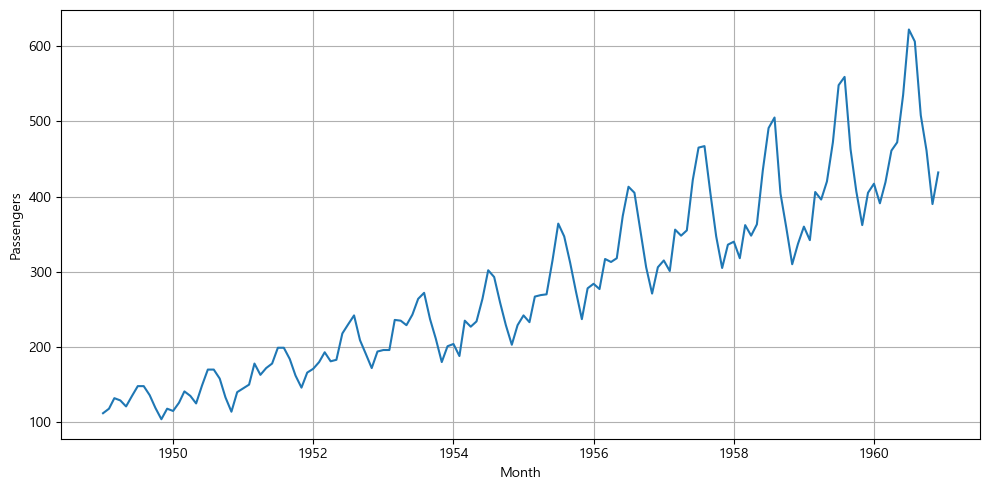

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | 0.8153688792060482  |
| 유의수준(p-value)                | 0.991880243437641   |
| 최적차수(num of lags)            | 13                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 1차 차분 데이터 ===========


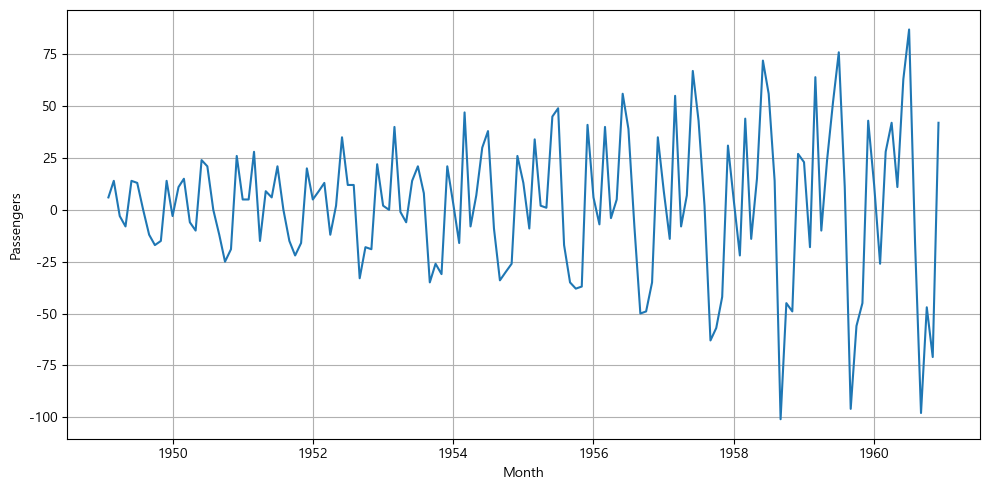

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | -2.8292668241699994 |
| 유의수준(p-value)                | 0.0542132902838255  |
| 최적차수(num of lags)            | 12                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 2차 차분 데이터 ===========


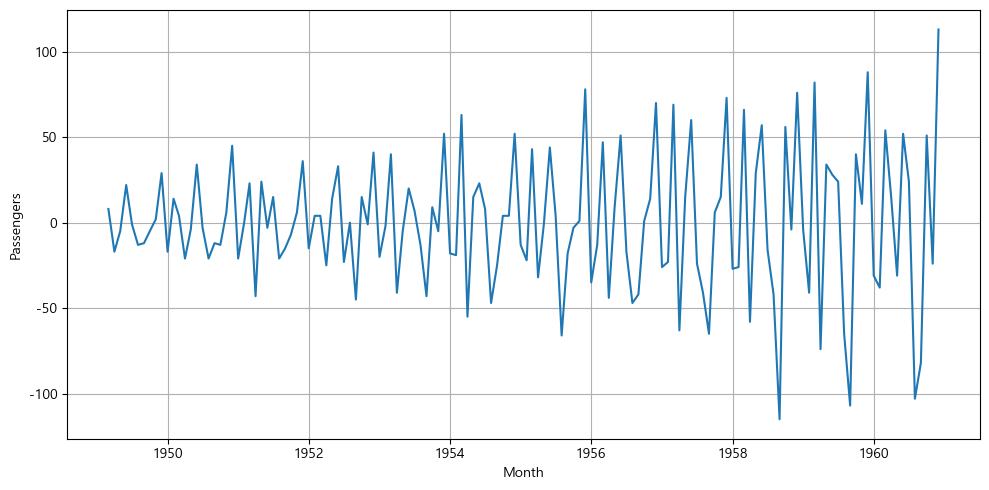

+----------------------------------+------------------------+
|                                  | ADF Test               |
|----------------------------------+------------------------|
| 검정통계량(ADF Statistic)        | -16.384231542468505    |
| 유의수준(p-value)                | 2.7328918500142407e-29 |
| 최적차수(num of lags)            | 11                     |
| 관측치 개수(num of observations) | 130                    |
| 기각값(Critical Values) 1%       | -3.4816817173418295    |
| 기각값(Critical Values) 5%       | -2.8840418343195267    |
| 기각값(Critical Values) 10%      | -2.578770059171598     |
| 데이터 정상성 여부               | 정상                   |
+----------------------------------+------------------------+


In [6]:
df = my_diff(origin, 'Passengers')

## #03. 평균이동법

가장 고전적인 시계열 데이터 분석 방법

주어진 구간의 평균을 구해서 이어서 표시하는 것으로 미래의 데이터를 예측한다.

구간은 분석가가 임의로 정할 수 있다.

평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단

과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 평균이동을 계산하면 이들의 추세를 통해 다음 기간을 예측할 수 있다.

> 2~3개 단위로 묶어서 평균을 구해 그 추이를 시각화 해서 판별하는 주관적 방법

데이터의 증감 경향을 확인하기 위해 차분되지 않은 원본 데이터로 하는 경우도 있다.

### [1] 차분되지 않은 원본에 대한 3개월, 6개월, 9개월 평균

#### 평균이동 수행

In [7]:
df2 = origin.copy()
df2['month3'] = df2['Passengers'].rolling(3).mean()
df2['month6'] = df2['Passengers'].rolling(6).mean()
df2['month9'] = df2['Passengers'].rolling(9).mean()
my_pretty_table(df2.head(15))

+---------------------+--------------+----------+----------+----------+
| Month               |   Passengers |   month3 |   month6 |   month9 |
|---------------------+--------------+----------+----------+----------|
| 1949-01-01 00:00:00 |          112 |      nan |      nan |      nan |
| 1949-02-01 00:00:00 |          118 |      nan |      nan |      nan |
| 1949-03-01 00:00:00 |          132 |  120.667 |      nan |      nan |
| 1949-04-01 00:00:00 |          129 |  126.333 |      nan |      nan |
| 1949-05-01 00:00:00 |          121 |  127.333 |      nan |      nan |
| 1949-06-01 00:00:00 |          135 |  128.333 |    124.5 |      nan |
| 1949-07-01 00:00:00 |          148 |  134.667 |    130.5 |      nan |
| 1949-08-01 00:00:00 |          148 |  143.667 |    135.5 |      nan |
| 1949-09-01 00:00:00 |          136 |      144 |  136.167 |      131 |
| 1949-10-01 00:00:00 |          119 |  134.333 |    134.5 |  131.778 |
| 1949-11-01 00:00:00 |          104 |  119.667 |  131.667 |  13

#### 시계열 그래프 확인

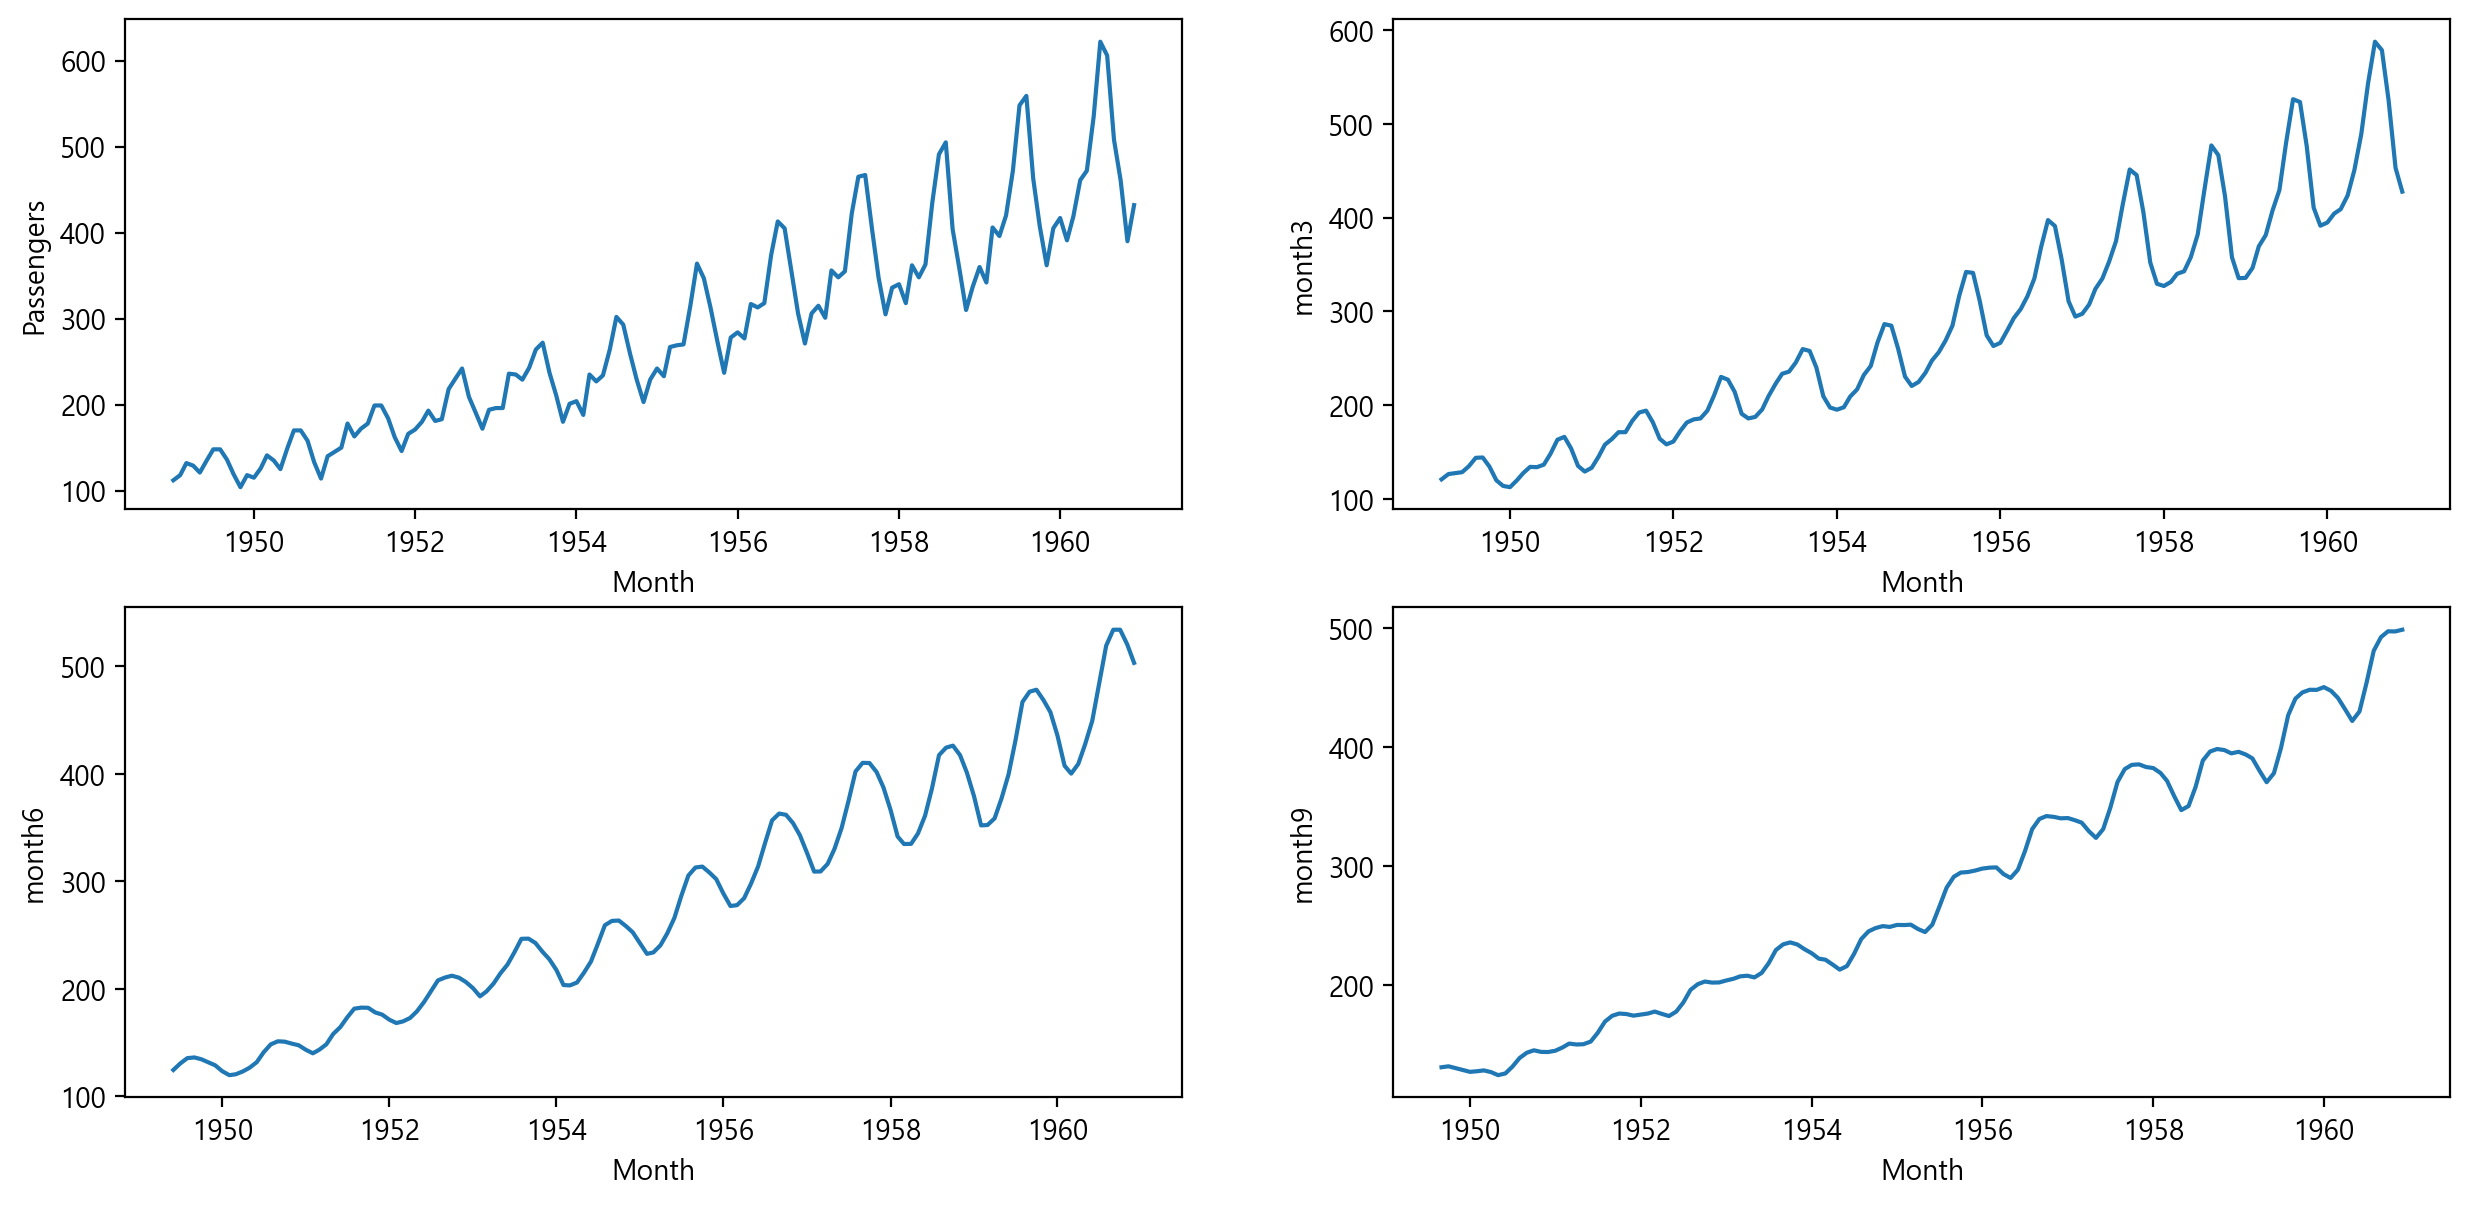

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (15,7))

sb.lineplot(df2, x=df2.index, y='Passengers', ax=ax1)
sb.lineplot(df2, x=df2.index, y='month3', ax=ax2)
sb.lineplot(df2, x=df2.index, y='month6', ax=ax3)
sb.lineplot(df2, x=df2.index, y='month9', ax=ax4)

plt.show()
plt.close()

### [2] 차분된 데이터 대한 3개월, 6개월, 9개월 평균

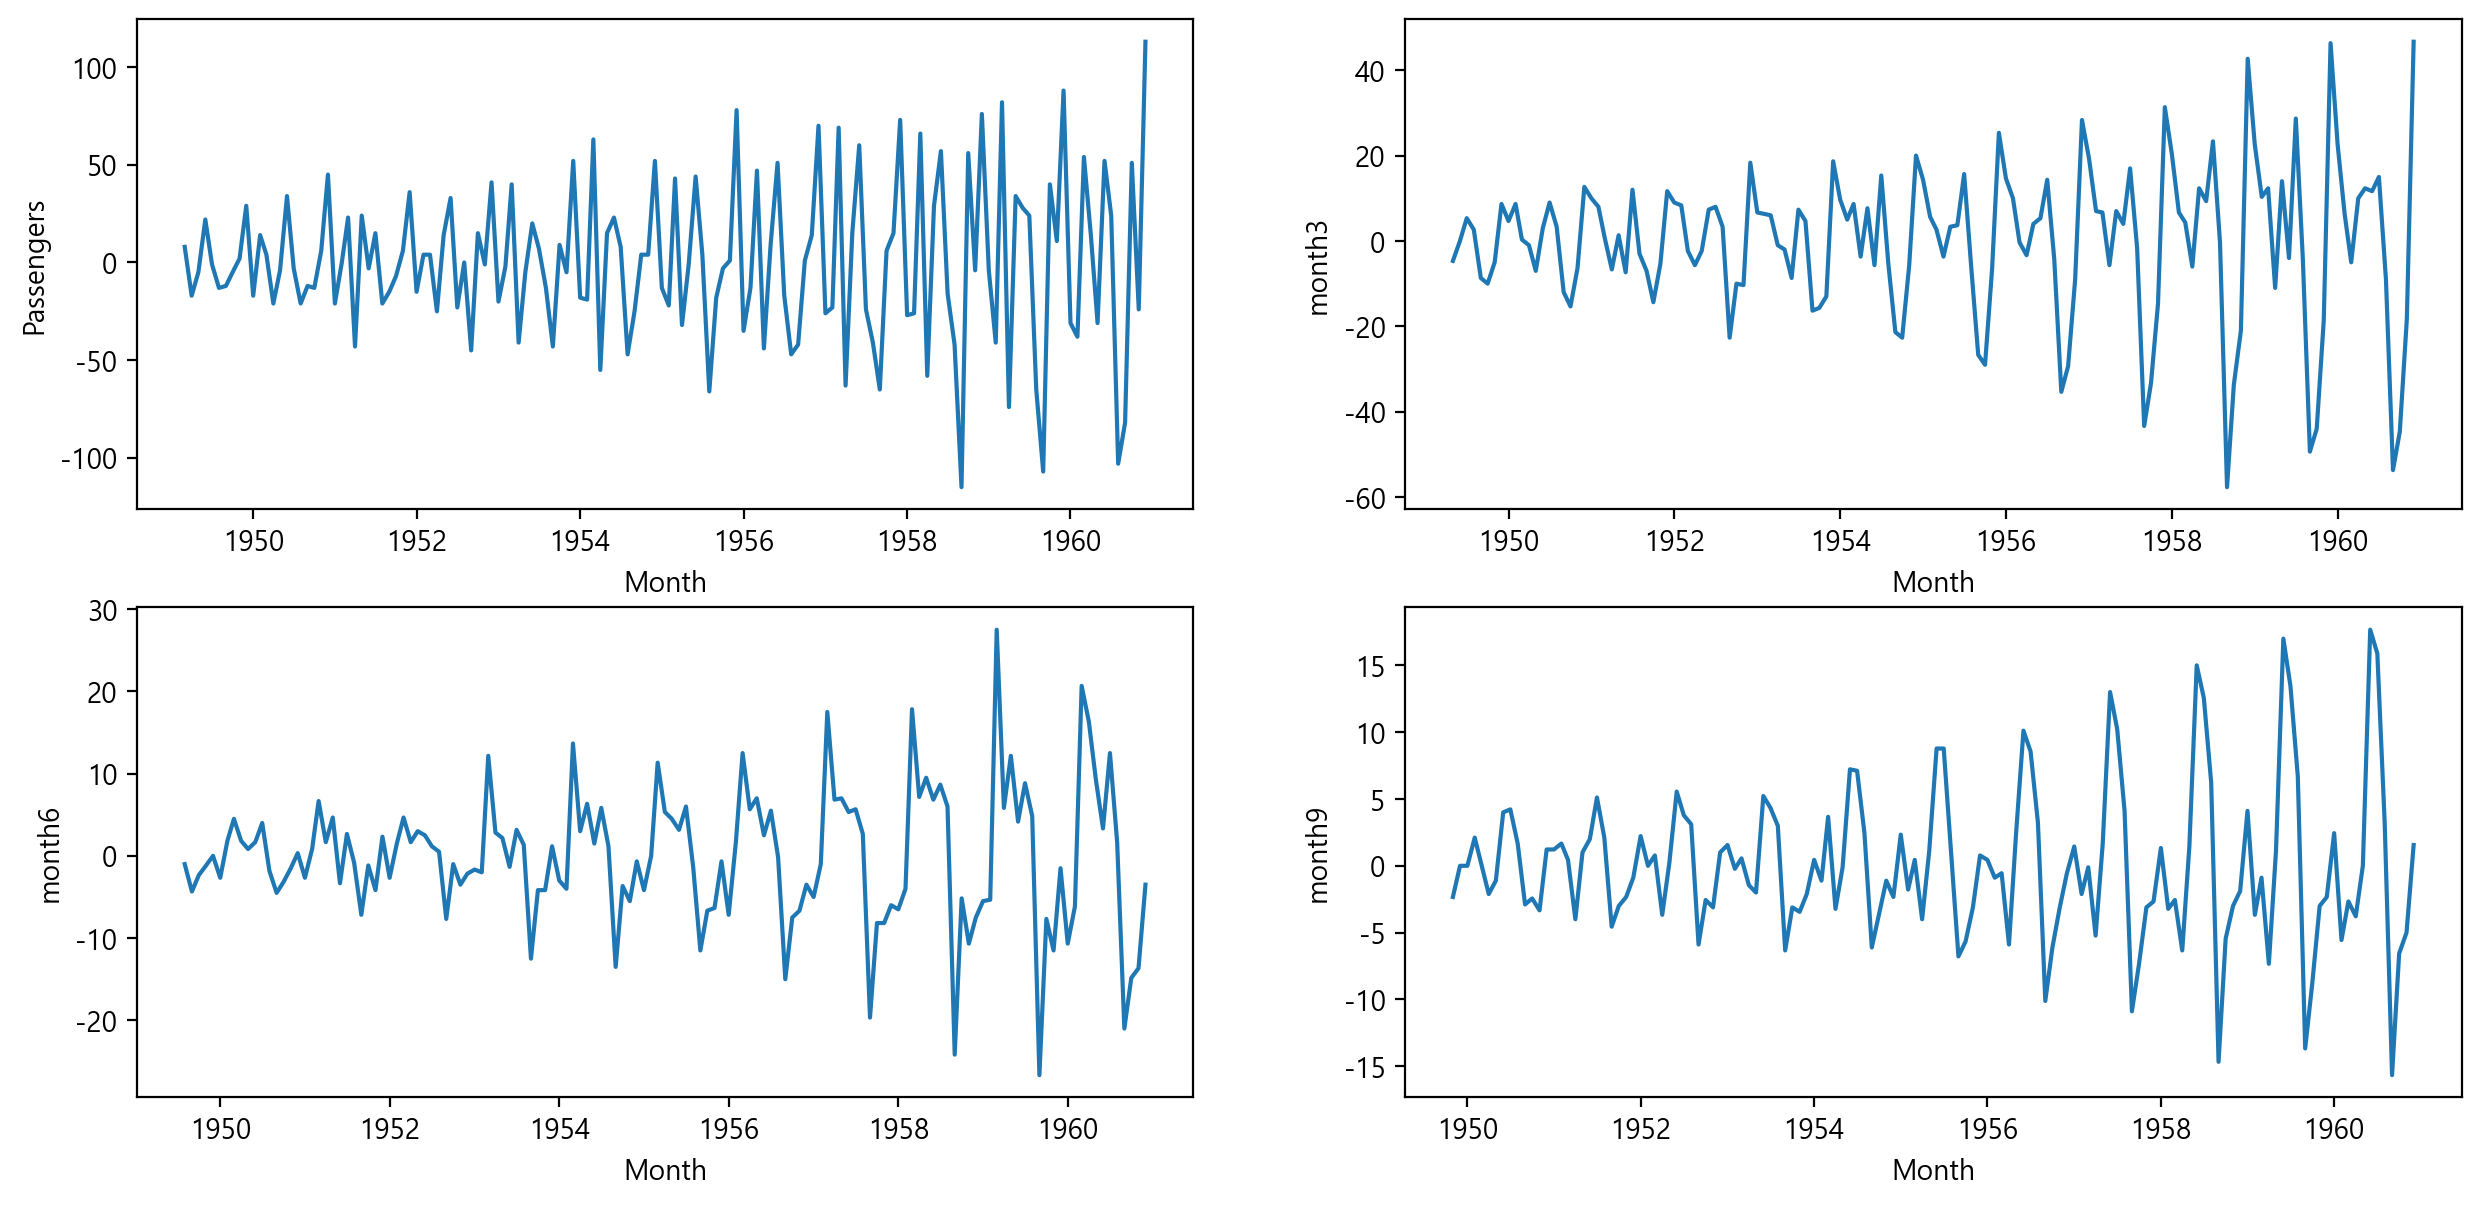

In [9]:
df['month3'] = df['Passengers'].rolling(3).mean()
df['month6'] = df['Passengers'].rolling(6).mean()
df['month9'] = df['Passengers'].rolling(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(df, x=df.index, y='Passengers', ax=ax1)
sb.lineplot(df, x=df.index, y='month3', ax=ax2)
sb.lineplot(df, x=df.index, y='month6', ax=ax3)
sb.lineplot(df, x=df.index, y='month9', ax=ax4)

plt.show()
plt.close()




## #04. 지수평활법

보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법

### (1) 원본에 대한 지수평활법

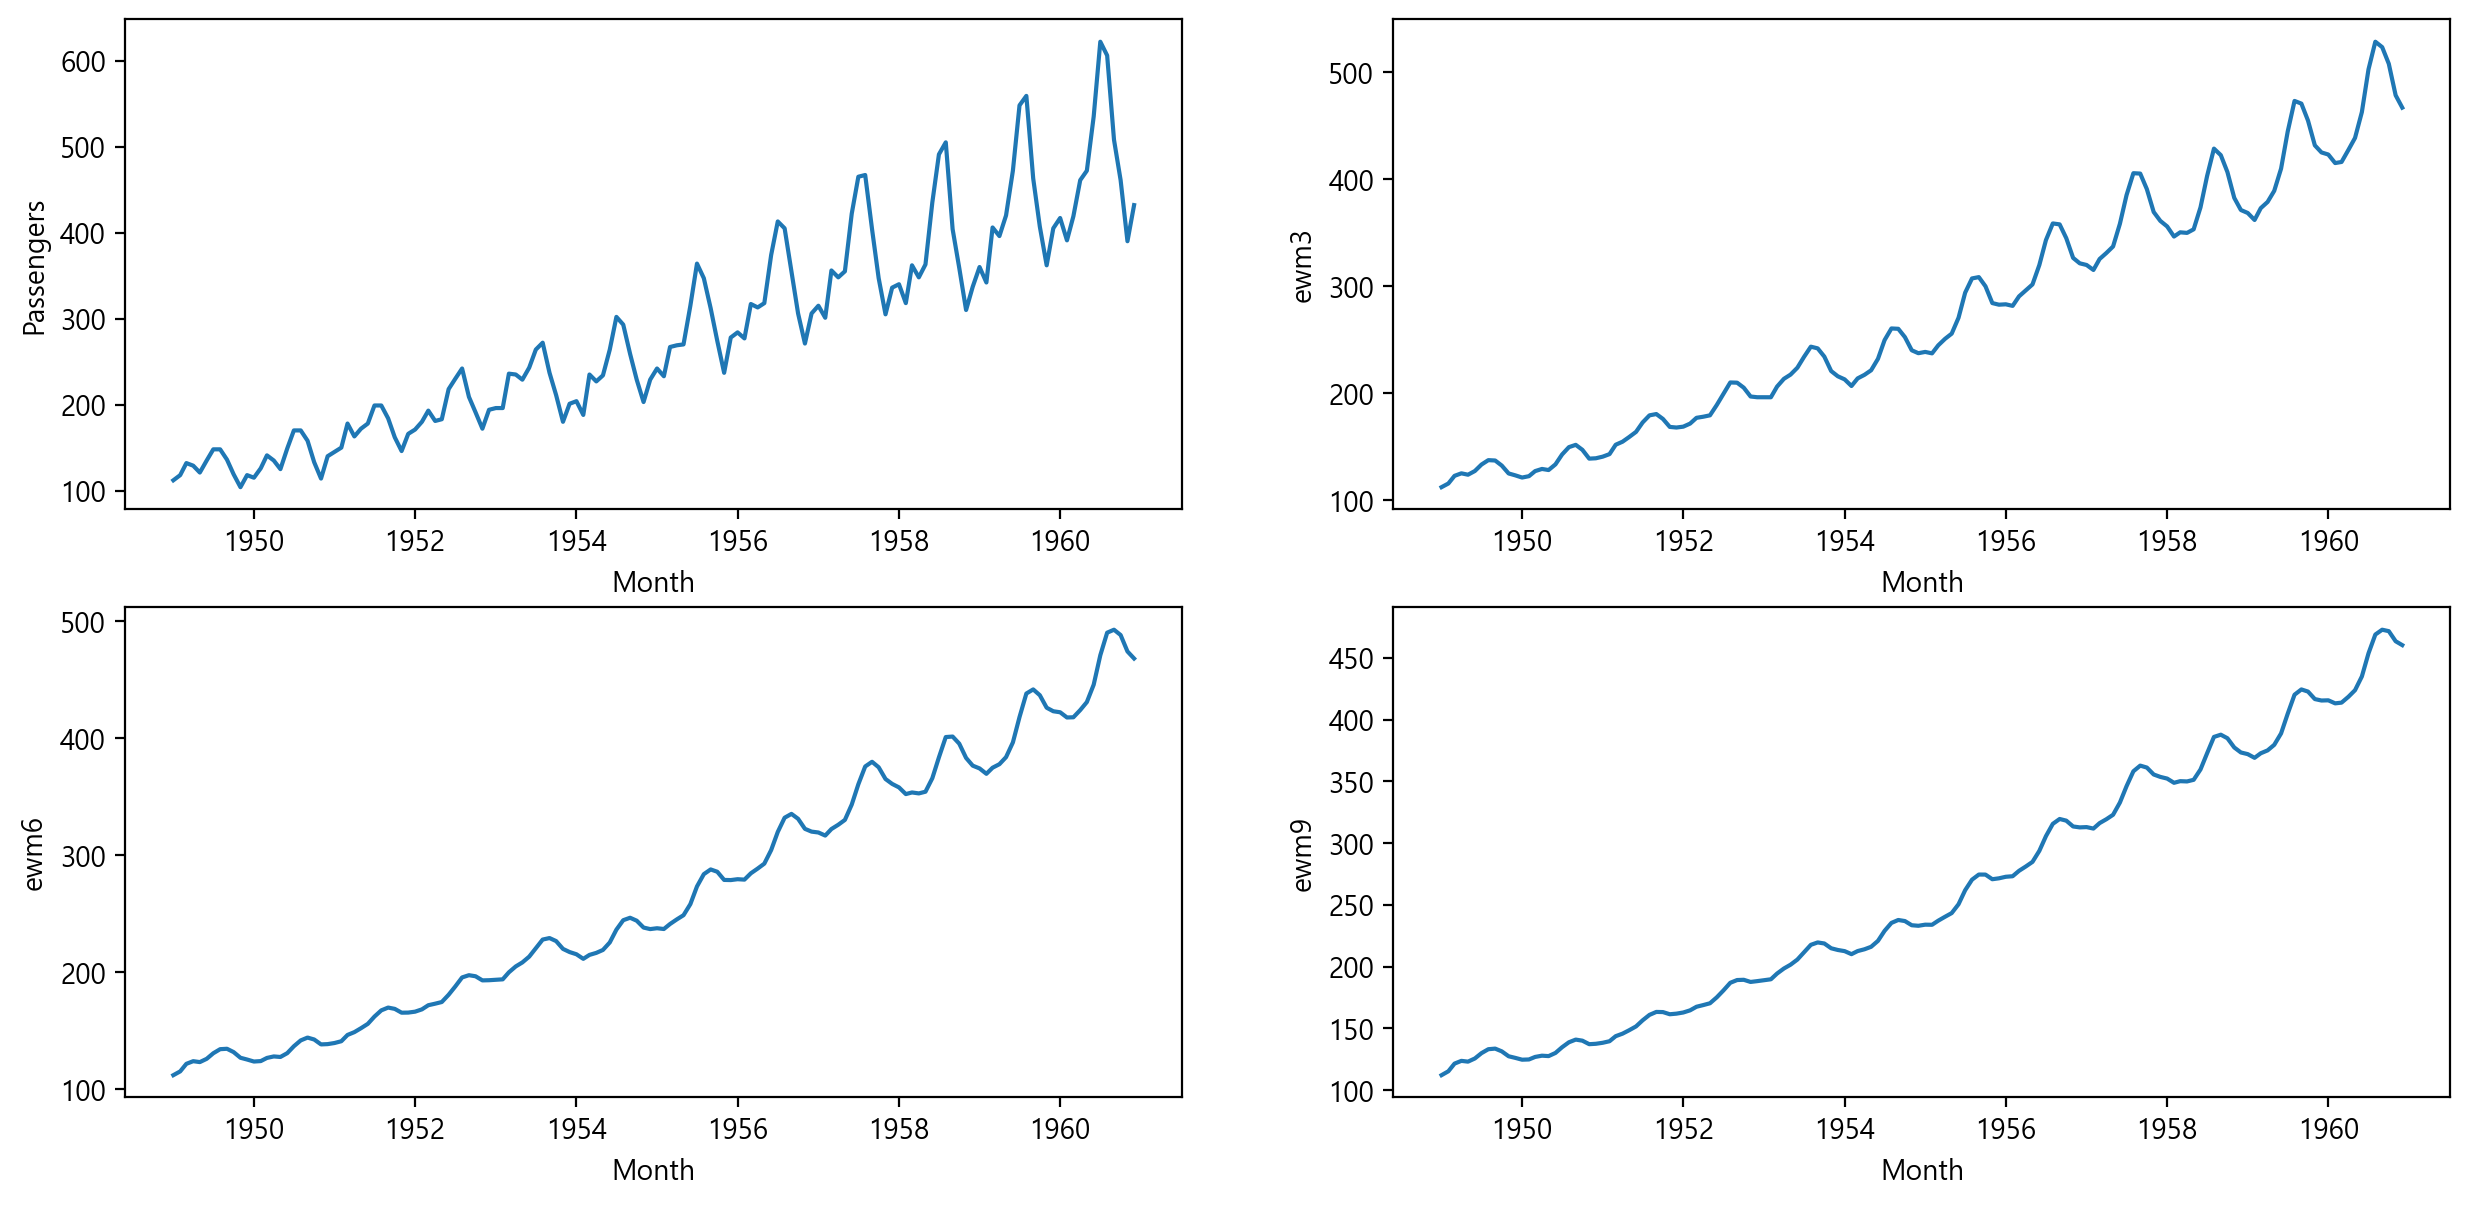

In [10]:
df2 = origin.copy()
df2['ewm3'] = df2['Passengers'].ewm(3).mean()
df2['ewm6'] = df2['Passengers'].ewm(6).mean()
df2['ewm9'] = df2['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (15,7))

sb.lineplot(df2, x=df2.index, y='Passengers', ax=ax1)
sb.lineplot(df2, x=df2.index, y='ewm3', ax=ax2)
sb.lineplot(df2, x=df2.index, y='ewm6', ax=ax3)
sb.lineplot(df2, x=df2.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

### (2) 차분 결과에 대한 지수평활법

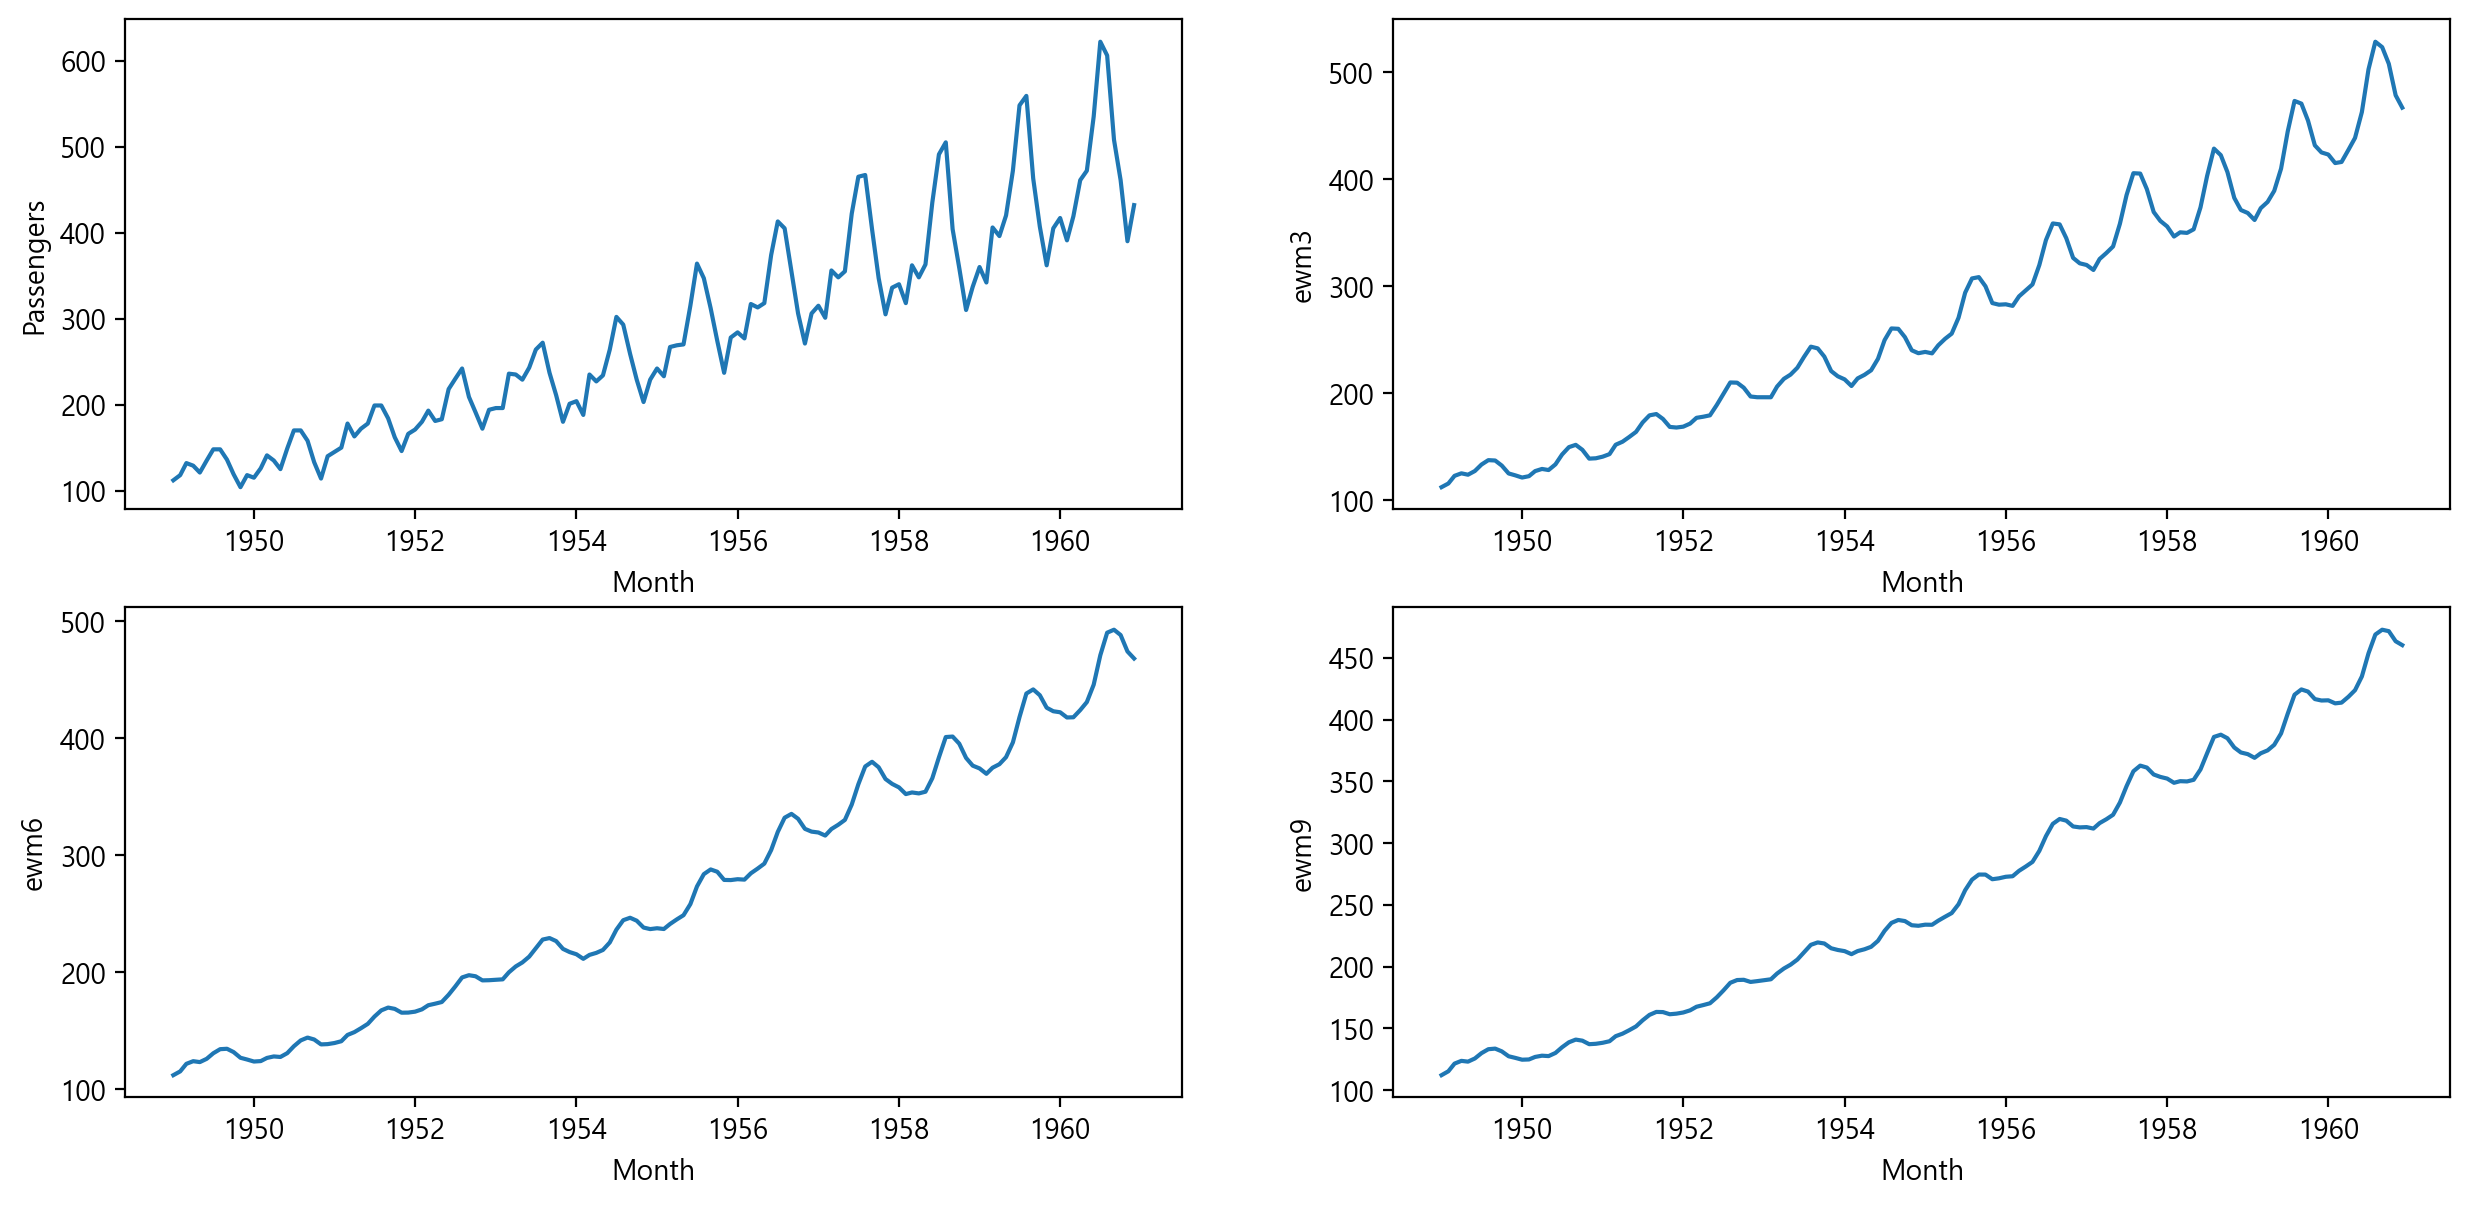

In [11]:
df = origin.copy()
df['ewm3'] = df['Passengers'].ewm(3).mean()
df['ewm6'] = df['Passengers'].ewm(6).mean()
df['ewm9'] = df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (15,7))

sb.lineplot(df, x=df.index, y='Passengers', ax=ax1)
sb.lineplot(df, x=df.index, y='ewm3', ax=ax2)
sb.lineplot(df, x=df.index, y='ewm6', ax=ax3)
sb.lineplot(df, x=df.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

## #05. 분해시계열

시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법

시계열 자료를 추세(Trend), 계절성(Seasonal), 잔차(Rasid)로 분해

| 구분 | 설명 |
|---|---|
| 가법모델(Additive Model) | 시계열 데이터를 구성하는 각 성분이 덧셈을 통해 연결되어 있다고 가정 |
| 승법모델(Multiplicative Model) | 각 성분이 곱셈을 통해 연결되어 있다고 가정<br/>승법 모델은 로그 변환을 통해 가법 모델로 쉽게 변환 가능함 |

![img](res/model.png)

모델 선택은 시계열 데이터의 특성을 고려하면 되는데, 위 그림의 왼편 그래프와 같이 시간에 따른 데이터 변동이 일정한 경우는 가법 모델을 활용한 데이터 분해가 적합함

### [1] 분해 시계열 생성

In [12]:
#model_name = 'additive'  # 가법모델
model_name = 'multiplicative'  # 승법모델

# 분해 시계열 객체생성
sd = seasonal_decompose(origin['Passengers'], model = model_name)

In [14]:
# trend, seasonal, residual 데이터 프레임으로 변환
sd_df = DataFrame({
    '관측값': sd.observed,
    '트렌드': sd.trend,
    '계절성': sd.seasonal,
    '잔차': sd.resid
}, index = df.index)

my_pretty_table(sd_df.head(20))


+---------------------+----------+----------+----------+----------+
| Month               |   관측값 |   트렌드 |   계절성 |     잔차 |
|---------------------+----------+----------+----------+----------|
| 1949-01-01 00:00:00 |      112 |      nan |  0.91023 |      nan |
| 1949-02-01 00:00:00 |      118 |      nan | 0.883625 |      nan |
| 1949-03-01 00:00:00 |      132 |      nan |  1.00737 |      nan |
| 1949-04-01 00:00:00 |      129 |      nan | 0.975906 |      nan |
| 1949-05-01 00:00:00 |      121 |      nan | 0.981378 |      nan |
| 1949-06-01 00:00:00 |      135 |      nan |  1.11278 |      nan |
| 1949-07-01 00:00:00 |      148 |  126.792 |  1.22656 | 0.951664 |
| 1949-08-01 00:00:00 |      148 |   127.25 |  1.21991 | 0.953401 |
| 1949-09-01 00:00:00 |      136 |  127.958 |  1.06049 |  1.00222 |
| 1949-10-01 00:00:00 |      119 |  128.583 | 0.921757 |  1.00403 |
| 1949-11-01 00:00:00 |      104 |      129 | 0.801178 |  1.00627 |
| 1949-12-01 00:00:00 |      118 |   129.75 | 0.898824 |  1

### [2] 분해 시계열 시각화

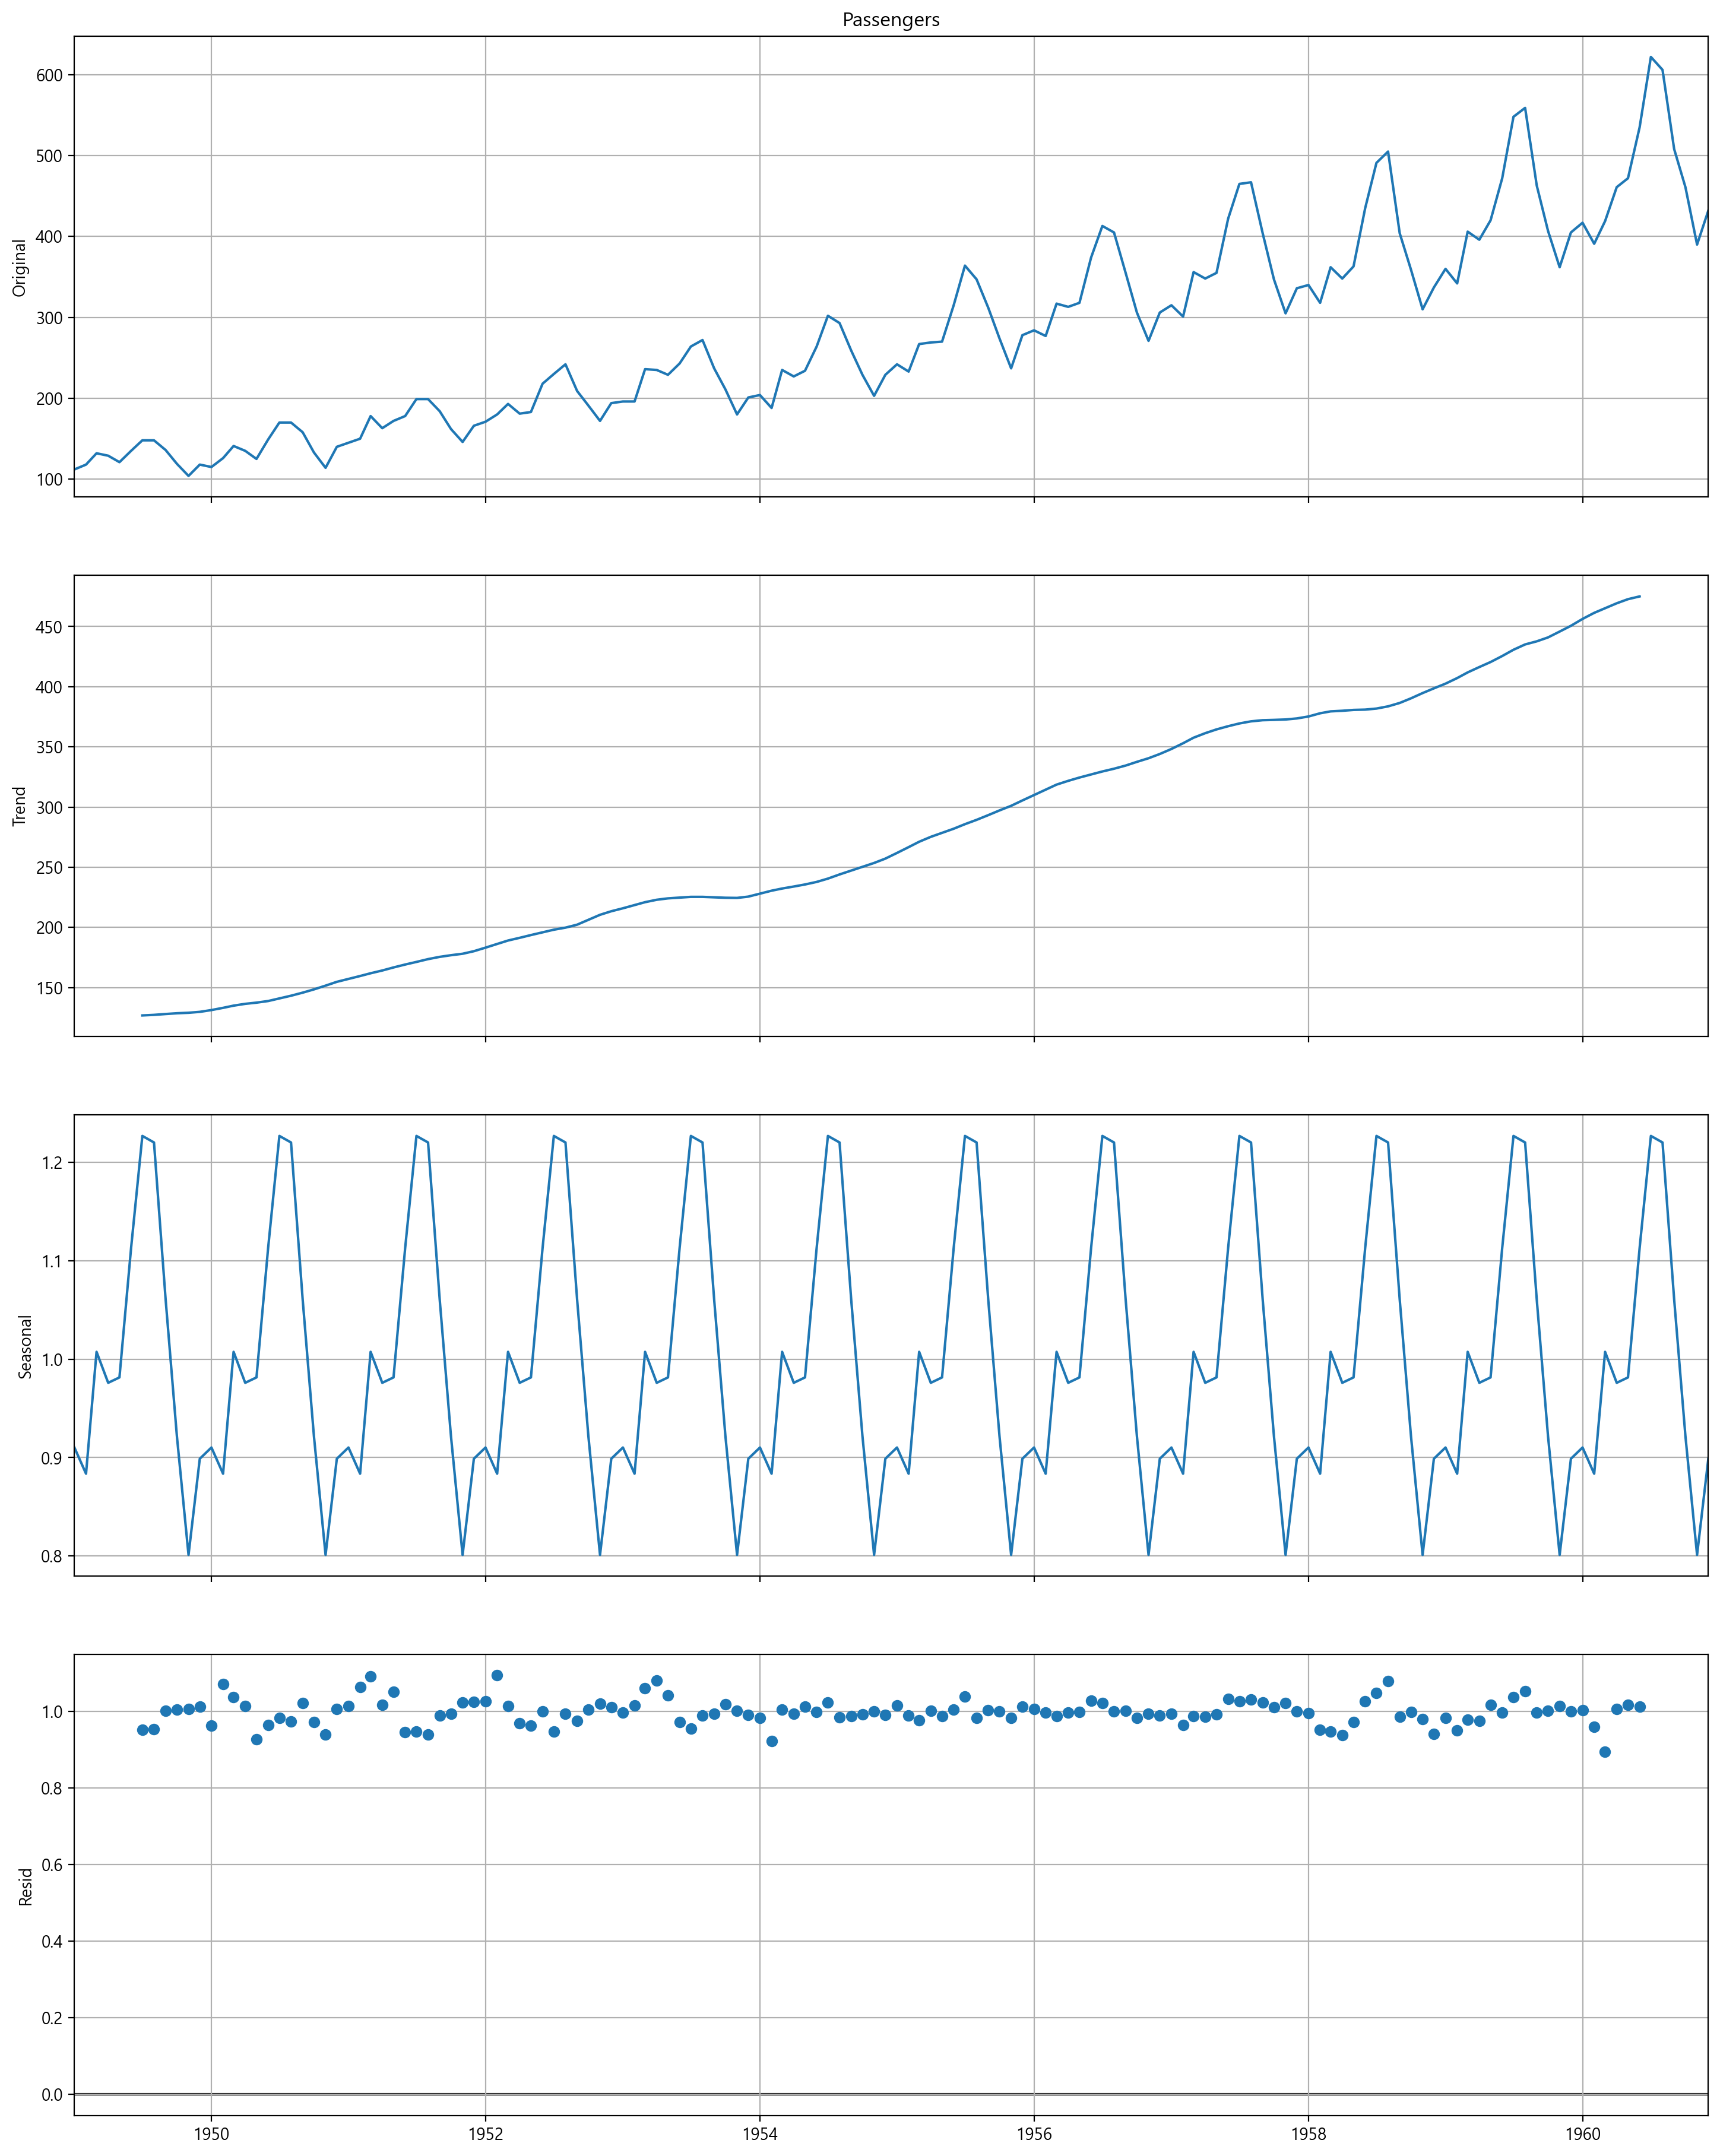

In [15]:
figure = sd.plot()
figure.set_size_inches((15, 20))

fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel("Original")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()
plt.close()
